## In this assignment, we will use Apriori analysis to find phrases, or interesting patterns in a novel.Use the nltk library corpus gutenberg API and load the novel 'carroll-alice.txt' which is theAlice in Wonderland by L. Carroll. There are 1703 sentences in the novel which can be represented as 1703 transactions. Use any means to parse/extract words and save in CSVformat to be read by Weka framework similar to the Apriori Analysis module.

Available Files:  ['carrol-alice.txt', 't10k-images-idx3-ubyte.gz', 't10k-images.idx3-ubyte', 't10k-labels-idx1-ubyte.gz', 't10k-labels.idx1-ubyte', 'train-images-idx3-ubyte.gz', 'train-images.idx3-ubyte', 'train-labels-idx1-ubyte.gz', 'train-labels.idx1-ubyte']

List of words used:  ['The', 'Project', 'Gutenberg', 'EBook', 'of', 'Alice', ...]

Word count:  16129

Top 3 most common words:  [(',', 808), ('the', 741), ('.', 546)]

Most common words:  ,


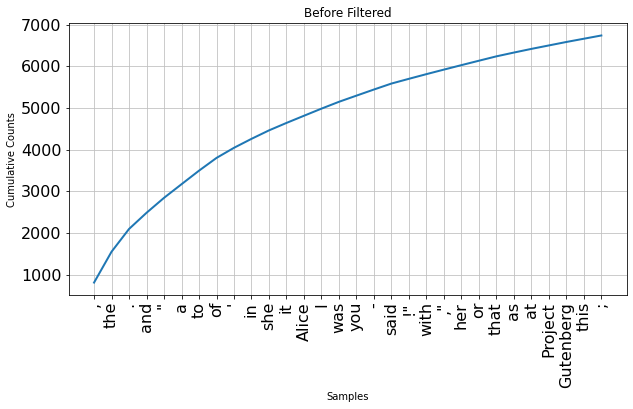

In [1]:
# !pip install textstat
import os, re
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm

from textstat.textstat import textstat
from nltk.corpus import PlaintextCorpusReader, stopwords
%matplotlib inline

##get current working directory
cwd = os.getcwd()

##datapath to textfile
datapath = cwd + '\\data\\'
filename = 'carrol-alice.txt'
filelists = PlaintextCorpusReader(cwd + '\\data\\', '.*')
print('Available Files: ', filelists.fileids())

##review words
wordslist = filelists.words(filename)

##raw word freq distribution
from nltk.probability import FreqDist
fdist = FreqDist(wordslist)

print('\nList of words used: ', wordslist)
print('\nWord count: ', len(wordslist))
print('\nTop 3 most common words: ', fdist.most_common(3))
print('\nMost common words: ', fdist.max())
# print('\nTabulated Results', type(fdist.tabulate()))

# Plot the frequency distribution of 30 words with
plt.figure(figsize=(10, 5))
plt.title('Before Filtered')
plt.xticks(fontsize= 16)
plt.yticks(fontsize= 16)
fdist.plot(30, cumulative=True)
plt.show()

In [2]:
##remove stopwords
Stop_words = stopwords.words('english')
print('\nStop Words: ')
print('-------------------------------------------------------------------')
print(Stop_words)

##adding additional words/symbols to stopwords to better filter wordslist 
additional_stop_words = ['.', ',', '"', "'", '-', ';', ':', '!', '(', ')', '[', ']', '?"', '!', '."',
                        '!"', ',"', '_', '--', 'like', 'the', 'The', 'it', 'There', 'said', 
                         'Gutenberg', 'tm', '1', 'Project', 'could', 'I', 'you', 'She', 'E', 'It',
                        'Illustration', 'Foundation', 'electronic', 'you', 'get', 'must', 'may', 
                         'If', 'quite', 'set', 'terms']
Stop_words = Stop_words + additional_stop_words
filtered_wordlist = []
for term in wordslist:
    if term not in Stop_words:
        filtered_wordlist.append(term)


Stop Words: 
-------------------------------------------------------------------
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', '

In [3]:
print('\nWords after Filtered: ')
print('-------------------------------------------------------------------')
print(set(filtered_wordlist))


Words after Filtered: 
-------------------------------------------------------------------
{'performed', 'grown', 'permanent', 'AGREE', 'alone', 'paws', 'words', 'field', 'voice', 'worm', 'impatiently', 'LIMITED', 'person', 'rise', 'takes', 'dried', 'purple', 'Robinson', 'prove', 'hot', 'EIN', 'executed', 'doubt', 'diamonds', 'however', 'added', 'letter', 'lonely', 'Isbell', 'outside', '_speaker_', 'Illustrator', 'formats', 'cherry', 'distributing', 'hearts', 'agreement', 'hole', 'Despite', '4557', 'still', 'paper', 'cunning', 'indignantly', 'choose', 'faces', 'temper', 'VII', 'Director', 'continued', 'pictures', 'go', '_I_', 'TRADEMARK', 'costs', 'crying', 'net', 'good', 'based', 'Which', 'somehow', 'nest', 'Dr', 'harmless', 'jar', 'honor', 'WARRANTY', 'WITH', 'practically', 'guess', 'Our', 'hastily', '_Was_', 'wretched', 'shorter', 'upright', 'IX', 'yesterday', 'paragraphs', 'row', 'Web', 'computer', 'animals', 'applicable', 'shook', 'cook', 'Nay', 'tunnel', 'fee', 'hour', 'POOL', '

In [4]:
fdist = FreqDist(filtered_wordlist)
print('\nWord count: ', len(filtered_wordlist))
print('\nTop 10 most common words: ', fdist.most_common(10))
print('\nMost common words: ', fdist.max())


Word count:  6386

Top 10 most common words:  [('Alice', 172), ('little', 57), ('work', 49), ('one', 34), ('works', 32), ('Rabbit', 31), ('You', 28), ('Queen', 28), ('went', 25), ('came', 25)]

Most common words:  Alice


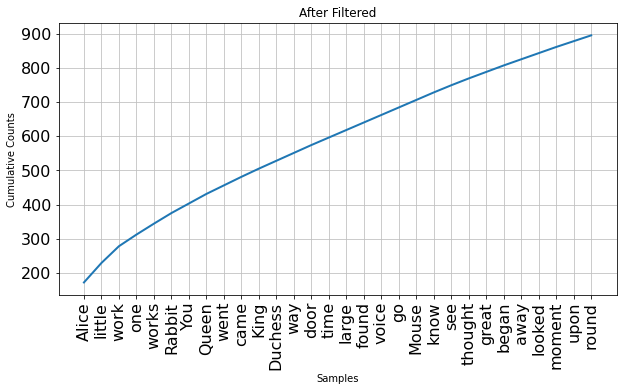

In [5]:
# Plot the frequency distribution of 30 words with
plt.figure(figsize=(10, 5))
plt.title('After Filtered')
plt.xticks(fontsize= 16)
plt.yticks(fontsize= 16)
fdist.plot(30, cumulative=True)
plt.show()

In [6]:
import pyfpgrowth

##bookkeeping
rule_dict = {'support_thresh': [], 'num_patterns': [], 'assoc_prob': [], 'num_rules':[]}

##set up grid search
support_thresholds = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
association_prob_thresholds = [0.7, 0.8, 0.9, 1.0]
for support_thresh in tqdm(support_thresholds, desc='Grid Search'):
    ##find patterns over a support threshold
    patterns = pyfpgrowth.find_frequent_patterns(filtered_wordlist, support_thresh)
    for assoc_prob in association_prob_thresholds:
        ##association rules among the list of patterns that meet probability threshold
        rules = pyfpgrowth.generate_association_rules(patterns, 0.9)
        rule_dict['support_thresh'].append(support_thresh)
        rule_dict['num_patterns'].append(len(patterns))
        rule_dict['assoc_prob'].append(assoc_prob)
        rule_dict['num_rules'].append(len(rules))

Grid Search: 100%|█████████████████████████████████████████████████████████████████████| 10/10 [04:46<00:00, 28.66s/it]


In [7]:
##create a words df to analyze gridsearch
rule_df = pd.DataFrame(rule_dict)
print('Rules Grid Search: \n', rule_df)

Rules Grid Search: 
     support_thresh  num_patterns  assoc_prob  num_rules
0                1        111301         0.7      93531
1                1        111301         0.8      93531
2                1        111301         0.9      93531
3                1        111301         1.0      93531
4                2         67704         0.7      53061
5                2         67704         0.8      53061
6                2         67704         0.9      53061
7                2         67704         1.0      53061
8                3         44072         0.7      32331
9                3         44072         0.8      32331
10               3         44072         0.9      32331
11               3         44072         1.0      32331
12               4         35695         0.7      25312
13               4         35695         0.8      25312
14               4         35695         0.9      25312
15               4         35695         1.0      25312
16               5         

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


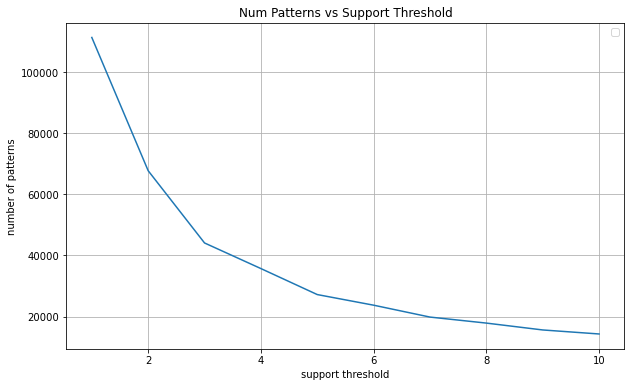

In [8]:
##plot accuracy results
plt.figure(figsize=(10,6))
plt.xlabel("support threshold")
plt.ylabel("number of patterns")
plt.title("Num Patterns vs Support Threshold")
plt.plot(rule_df['support_thresh'], rule_df['num_patterns'])

plt.grid()
plt.legend()
plt.show()

__Observations__:
From the above plot of number of patterns vs support threshold, it appears that as the support threshold goes up, the number of patters go down. A support threshold of 10 is used to reduce the number of patterns thus speeding up the analysis. What is left is approximately 7000 words that will be saved to csv. 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


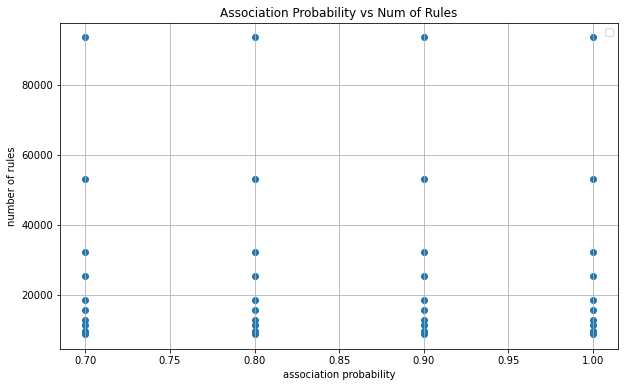

In [9]:
##plot accuracy results
plt.figure(figsize=(10,6))
plt.xlabel("association probability")
plt.ylabel("number of rules")
plt.title("Association Probability vs Num of Rules")
plt.scatter(rule_df['assoc_prob'], rule_df['num_rules'])

plt.grid()
plt.legend()
plt.show()

__Observations__:

From the above plot of number of rules vs association probability, and by looking at the rule df, it does not appear that the association probability is affected by the number of rules as I thought that it would be. It seems to me that this would certainly be the case for certain conditions.

In [10]:
##filtered wordslist to df to save to csv
fwl = pd.DataFrame(filtered_wordlist)
fwl.to_csv('frequent_words_list_filtered.csv')

## In the lecture module, the class NeuralNetMLP is a single hidden layer neural network implementation. Make the necessary modifications to upgrade it to a 2 hidden layer network. Run it on the MNIST dataset and report its performance. (Hint: Raschka, Chapter 12)

In [11]:
'''
Note:
This code is from the course code from module11_mlp_notebook.html.
'''
def load_mnist(path, kind='train'):
    from numpy import fromfile, uint8
    import os
    import struct
    print('\nLoading Dataset: ')
    labels_path = os.path.join(path, '%s-labels.idx1-ubyte' % kind)
    images_path = os.path.join(path, '%s-images.idx3-ubyte' % kind)
    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II', lbpath.read(8))
        labels = fromfile(lbpath, dtype=uint8)
        with open(images_path, 'rb') as imgpath:
            magic, num, rows, cols = struct.unpack(">IIII",imgpath.read(16))
            images = fromfile(imgpath, dtype=uint8).reshape(len(labels), 784)
            images = ((images / 255.) - .5) * 2
    return images, labels

X_train, y_train = load_mnist(datapath, kind='train')
print(f'Rows= {X_train.shape[0]}, columns= {X_train.shape[1]}')

X_test, y_test = load_mnist(datapath, kind='t10k')
print(f'Rows= {X_test.shape[0]}, columns= {X_test.shape[1]}')


Loading Dataset: 
Rows= 60000, columns= 784

Loading Dataset: 
Rows= 10000, columns= 784


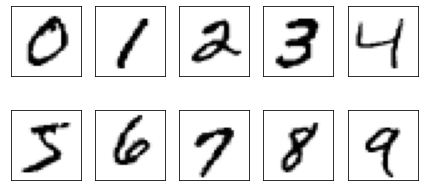

In [12]:
'''
Note:
This code is from the course code from module11_mlp_notebook.html.
'''

##plot numbers 
fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(10):
    img = X_train[y_train == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    plt.tight_layout()
plt.show()

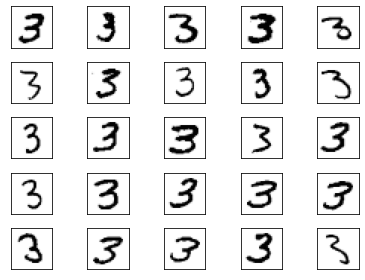

In [13]:
'''
Note:
This code is from the course code from module11_mlp_notebook.html.
'''
##plot 3s
fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True)
ax = ax.flatten()
for i in range(25):
    img = X_train[y_train == 3][i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    plt.tight_layout()
plt.show()

__Single Hidden Layer MLP__

In [14]:
'''
Note:
This the original code and
was taken from the course code found in module11_mlp_notebook.html
'''

def get_acc(_y_test, _y_pred):
    return ((np.sum(_y_test == _y_pred)).astype(float) / _y_test.shape[0])

class NeuralNetMLP1Hid(object):

    def __init__(self, n_hidden=30, epochs=100, eta=0.001, minibatch_size=1, seed=None):
        self.random = np.random.RandomState(seed)  # used to randomize weights
        self.n_hidden = n_hidden  # size of the hidden layer
        self.epochs = epochs  # number of iterations
        self.eta = eta  # learning rate
        self.minibatch_size = minibatch_size  # size of training batch - 1 would not work
        self.h1 = {'epoch': [], 'cost': [], 'train_acc': [], 'valid_acc': []} # empty dict to store results
    
    @staticmethod
    def onehot(y, n_classes):  # one hot encode the input class y
        onehot = np.zeros((n_classes, y.shape[0]))
        for idx, val in enumerate(y.astype(int)):
            onehot[val, idx] = 1.0
        return onehot.T
    
    @staticmethod
    def sigmoid(z):  # Eq 1
        return 1.0 / (1.0 + np.exp(-np.clip(z, -250, 250)))

    def _forward(self, X):  # Eq 2
        z_h = np.dot(X, self.w_h)
        a_h = self.sigmoid(z_h)
        z_out = np.dot(a_h, self.w_out)
        a_out = self.sigmoid(z_out)
        return z_h, a_h, z_out, a_out

    @staticmethod
    def compute_cost(y_enc, output):  # Eq 4
        term1 = -y_enc * (np.log(output))
        term2 = (1.0-y_enc) * np.log(1.0-output)
        cost = np.sum(term1 - term2)
        return cost

    def predict(self, X):
        z_h, a_h, z_out, a_out = self._forward(X)
        y_pred = np.argmax(z_out, axis=1)
        return y_pred

    def fit(self, X_train, y_train, X_valid, y_valid):
        import sys
        
        ##bookkeeping
        n_output = np.unique(y_train).shape[0]  # number of class labels
        n_features = X_train.shape[1]
        self.w_out = self.random.normal(loc=0.0, scale=0.1, size=(self.n_hidden, n_output)) 
        self.w_h = self.random.normal(loc=0.0, scale=0.1, size=(n_features, self.n_hidden))
        y_train_enc = self.onehot(y_train, n_output)  # one-hot encode original y
        for i in range(self.epochs):  # Ideally must shuffle at every epoch
            indices = np.arange(X_train.shape[0])
            for start_idx in range(0, indices.shape[0] - self.minibatch_size + 1, self.minibatch_size):
                batch_idx = indices[start_idx:start_idx + self.minibatch_size]
                z_h, a_h, z_out, a_out = self._forward(X_train[batch_idx])  # neural network model
                sigmoid_derivative_h = a_h * (1.0-a_h)  # Eq 3
                delta_out = a_out - y_train_enc[batch_idx]  # Eq 5
                delta_h = (np.dot(delta_out, self.w_out.T) * sigmoid_derivative_h)  # Eq 6
                grad_w_out = np.dot(a_h.T, delta_out)  # Eq 7
                grad_w_h = np.dot(X_train[batch_idx].T, delta_h)  # Eq 8
                self.w_out -= self.eta*grad_w_out  # Eq 9
                self.w_h -= self.eta*grad_w_h  # Eq 9

            # Evaluation after each epoch during training
            z_h, a_h, z_out, a_out = self._forward(X_train)
            cost = self.compute_cost(y_enc=y_train_enc, output=a_out)
            y_train_pred = self.predict(X_train)  # monitoring training progress through reclassification
            y_valid_pred = self.predict(X_valid)  # monitoring training progress through validation
            train_acc = ((np.sum(y_train == y_train_pred)).astype(float) / X_train.shape[0])
            valid_acc = ((np.sum(y_valid == y_valid_pred)).astype(float) / X_valid.shape[0])
            
            ##append to dictionary for performance testing
            self.h1['epoch'].append(i)
            self.h1['cost'].append(cost)
            self.h1['train_acc'].append(train_acc)
            self.h1['valid_acc'].append(valid_acc)
            
            sys.stderr.write('\r%d/%d | Cost: %.2f ' '| Train/Valid Acc.: %.2f%%/%.2f%% '%
                (i+1, self.epochs, cost, train_acc*100, valid_acc*100))
            sys.stderr.flush()
        return self

In [15]:
%%time

##instantiate single hidden layer MLP
nn_1_hid = NeuralNetMLP1Hid(n_hidden=30, epochs=100, eta=0.0005, minibatch_size=100, seed=1)

##train singgle hidden layer MLP
nn_1_hid.fit(X_train=X_train[:55000], y_train=y_train[:55000], X_valid=X_train[55000:], y_valid=y_train[55000:]) ;

##get predictions
y_pred = nn_1_hid.predict(X_test)

##evaluate
print(f'Accuracy= {get_acc(y_test,y_pred)*100:.2f}%')
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

100/100 | Cost: 14363.27 | Train/Valid Acc.: 96.66%/96.04% 

Accuracy= 95.36%
[[ 961    0    1    2    1    4    7    1    3    0]
 [   0 1114    4    1    0    1    5    2    8    0]
 [   8    0  969    9   11    2    7    7   18    1]
 [   0    1   10  962    0   10    0   11   14    2]
 [   1    1    4    0  954    0    6    0    4   12]
 [   5    1    0   24    5  818   11    2   20    6]
 [   9    2    6    0    6    8  922    0    5    0]
 [   0    5   10   10    7    2    0  978    2   14]
 [   6    2    2   11    7    6    6    6  924    4]
 [   7    3    0   11   29    9    1   10    5  934]]
CPU times: total: 8min 41s
Wall time: 1min 5s


__Two Hidden Layer MLP__

In [16]:
'''
Note:
This code was taken from the course code found in module11_mlp_notebook.html and has been modified
for a two hidden layer MLP implementation. See comments in _forward and fit functions in 
NeuralNetMLP2Hid.
'''
class NeuralNetMLP2Hid(object):

    def __init__(self, n_hidden=30, epochs=100, eta=0.001, minibatch_size=1, seed=None):
        self.random = np.random.RandomState(seed)  # used to randomize weights
        self.n_hidden = n_hidden  # size of the hidden layer
        self.epochs = epochs  # number of iterations
        self.eta = eta  # learning rate
        self.minibatch_size = minibatch_size  # size of training batch - 1 would not work
        self.h2 = {'epoch': [], 'cost': [], 'train_acc': [], 'valid_acc': []} # empty dict to store results
    
    @staticmethod
    def onehot(y, n_classes):  # one hot encode the input class y
        onehot = np.zeros((n_classes, y.shape[0]))
        for idx, val in enumerate(y.astype(int)):
            onehot[val, idx] = 1.0
        return onehot.T
    
    @staticmethod
    def sigmoid(z):  # Eq 1
        return 1.0 / (1.0 + np.exp(-np.clip(z, -250, 250)))

    def _forward(self, X):  # Eq 2
        
        '''net input of hidden layer 1, using X as input'''
        z_h_1 = np.dot(X, self.w_h_1)
        
        '''activation of hidden layer 1'''
        a_h_1 = self.sigmoid(z_h_1)
        
        '''
        net input of hidden layer 2 using activation of hidden layer 1
        '''
        l1_out = np.dot(a_h_1, self.w_h_2.T)
        z_h = np.dot(l1_out, self.w_h_2)
        
        '''activation of hidden layer 2'''
        a_h = self.sigmoid(z_h)
        
        '''
        net input of output layer using activation of hidden layer 2
        '''
        z_out = np.dot(z_h, self.w_out)
        
        '''activation of output layer'''
        a_out = self.sigmoid(z_out)
        
        ##DEBUG 
        # print('\nX.shape: ', X.shape)
        # print('z_h shape: ', z_h_1.shape, 'z_h_2.shape: ', z_h_2.shape)
        # print('a_h shape: ', a_h_1.shape, 'a_h_2.shape: ', a_h_2.shape)
        # print('z_out shape: ', z_out.shape)
        # print('a_out shape: ', a_out.shape)
        return z_h_1, a_h_1, z_h, a_h, z_out, a_out

    @staticmethod
    def compute_cost(y_enc, output):  # Eq 4
        term1 = -y_enc * (np.log(output))
        term2 = (1.0-y_enc) * np.log(1.0-output)
        cost = np.sum(term1 - term2)
        return cost

    def predict(self, X):
        z_h_1, a_h_1, z_h_2, a_h_2, z_out, a_out = self._forward(X)
        y_pred = np.argmax(z_out, axis=1)
        return y_pred

    def fit(self, X_train, y_train, X_valid, y_valid):
        import sys
        n_output = np.unique(y_train).shape[0]  # number of class labels
        n_features = X_train.shape[1]
        
        '''Initialize weights for hidden layer 1, hidden layer 2, and output layer.'''
        self.w_h_1 = self.random.normal(loc=0.0, scale=0.1, size=(n_features, self.n_hidden))
        self.w_h_2 = self.random.normal(loc=0.0, scale=0.1, size=(n_features, self.n_hidden))
        self.w_out = self.random.normal(loc=0.0, scale=0.1, size=(self.n_hidden, n_output)) 
        
        ##train network
        y_train_enc = self.onehot(y_train, n_output)  # one-hot encode original y
        for i in range(self.epochs):  # Ideally must shuffle at every epoch
            indices = np.arange(X_train.shape[0])
            for start_idx in range(0, indices.shape[0] - self.minibatch_size + 1, self.minibatch_size):
                batch_idx = indices[start_idx:start_idx + self.minibatch_size]
                
                '''
                forward pass: hidden layer 1, 2, and the output layer are denoted by _1, 
                _2, and _out, respectively'''
                z_h_1, a_h_1, z_h_2, a_h_2, z_out, a_out = self._forward(X_train[batch_idx])  # neural network model
                
                '''
                calculate the derivatives of hidden layer 1 and hidden layer 2
                '''
                sigmoid_derivative_h_1 = a_h_1 * (1.0-a_h_1)  # Eq 3
                sigmoid_derivative_h_2 = a_h_2 * (1.0-a_h_2)  # Eq 3
                
                '''
                calculate difference of the output of network for calculation
                of equation 6 for each layer
                '''
                delta_out = a_out - y_train_enc[batch_idx]  # Eq 5
                
                '''
                use delta and derivative of sigmoid of each layer to calculate
                difference of each hidden layer
                '''
                delta_h_1 = (np.dot(delta_out, self.w_out.T) * sigmoid_derivative_h_1)  # Eq 6
                delta_h_2 = (np.dot(delta_out, self.w_out.T) * sigmoid_derivative_h_2)  # Eq 6
                
                '''
                calculate the gradient of each layer output with respect to the output
                layer
                '''
                grad_w_out_1 = np.dot(a_h_1.T, delta_out)  # Eq 7
                grad_w_out_2 = np.dot(a_h_2.T, delta_out)  # Eq 7
                
                '''
                calculate the gradient of each hidden layer
                '''
                grad_w_h_1 = np.dot(X_train[batch_idx].T, delta_h_1)  # Eq 8
                grad_w_h_2 = np.dot(X_train[batch_idx].T, delta_h_2)  # Eq 8
                
                '''
                update the weights of hidden layer 1, hidden layer 2, 
                and the output layer
                '''
                self.w_out -= (self.eta*grad_w_out_1 + self.eta*grad_w_out_2)# Eq 9
                self.w_h_1 -= self.eta*grad_w_h_1  # Eq 9
                self.w_h_2 -= self.eta*grad_w_h_2  # Eq 9

            # Evaluation after each epoch during training
            z_h_1, a_h_1, z_h_2, a_h_2, z_out, a_out = self._forward(X_train)
            cost = self.compute_cost(y_enc=y_train_enc, output=a_out)
            y_train_pred = self.predict(X_train)  # monitoring training progress through reclassification
            y_valid_pred = self.predict(X_valid)  # monitoring training progress through validation
            train_acc = ((np.sum(y_train == y_train_pred)).astype(float) / X_train.shape[0])
            valid_acc = ((np.sum(y_valid == y_valid_pred)).astype(float) / X_valid.shape[0])
            
            ##append to dictionary for performance testing
            self.h2['epoch'].append(i)
            self.h2['cost'].append(cost)
            self.h2['train_acc'].append(train_acc)
            self.h2['valid_acc'].append(valid_acc)
            
            sys.stderr.write('\r%d/%d | Cost: %.2f ' '| Train/Valid Acc.: %.2f%%/%.2f%% '%
                (i+1, self.epochs, cost, train_acc*100, valid_acc*100))
            sys.stderr.flush()
        return self

In [17]:
%%time

##instantiate single hidden layer MLP
nn_2_hid = NeuralNetMLP2Hid(n_hidden=30, epochs=100, eta=0.0005, minibatch_size=100, seed=1)

##train singgle hidden layer MLP
nn_2_hid.fit(X_train=X_train[:55000], y_train=y_train[:55000], X_valid=X_train[55000:], y_valid=y_train[55000:]) ;

##get predictions
y_pred = nn_2_hid.predict(X_test)

##evaluate
print(f'Accuracy= {get_acc(y_test,y_pred)*100:.2f}%')
print(confusion_matrix(y_test,y_pred))

100/100 | Cost: 14509.65 | Train/Valid Acc.: 96.65%/96.64% 

Accuracy= 95.53%
[[ 963    0    1    0    0    4    4    2    5    1]
 [   0 1117    2    4    1    1    3    3    4    0]
 [   9    2  968    6    9    4    4    8   20    2]
 [   3    0   11  961    0    7    0   10   11    7]
 [   1    1    1    0  942    1    6    2   10   18]
 [   7    1    1   20    4  834   11    1   11    2]
 [   9    4    0    1   12    5  922    0    5    0]
 [   2    9   14    5    2    1    0  988    3    4]
 [   4    2    5    5    9    4    4    7  932    2]
 [   6    5    3   10   32   12    0   11    4  926]]
CPU times: total: 18min 30s
Wall time: 2min 18s



Performance Hidden Layer 1 MLP:     epoch           cost  train_acc  valid_acc
0      0  102843.657308   0.755000     0.7864
1      1   67278.827896   0.853036     0.8842
2      2   52686.634322   0.882400     0.9076
3      3   44944.678768   0.896055     0.9174
4      4   40230.493919   0.904036     0.9228

Performance Hidden Layer 2 MLP:     epoch          cost  train_acc  valid_acc
0      0  63365.454457   0.826945     0.8696
1      1  50809.378617   0.865036     0.9044
2      2  45214.965775   0.880673     0.9142
3      3  41682.420068   0.890327     0.9204
4      4  39072.973170   0.897400     0.9242


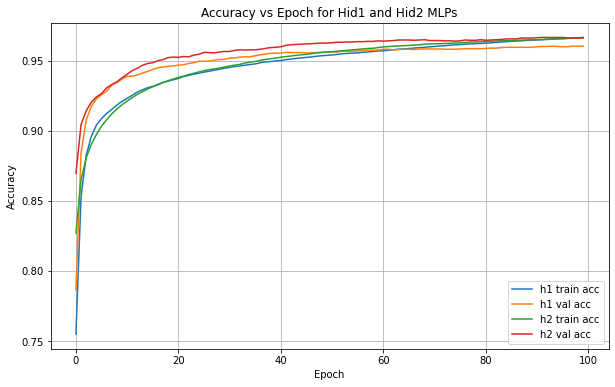

In [18]:
##visualize performance
df_h1 = pd.DataFrame(nn_1_hid.h1)
df_h2 = pd.DataFrame(nn_2_hid.h2)
print('\nPerformance Hidden Layer 1 MLP: ', df_h1.head())
print('\nPerformance Hidden Layer 2 MLP: ', df_h2.head())

##plot accuracy results of train and validation sets
plt.figure(figsize=(10,6))
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Epoch for Hid1 and Hid2 MLPs")
plt.plot(df_h1['epoch'], df_h1['train_acc'], label = "h1 train acc")
plt.plot(df_h1['epoch'], df_h1['valid_acc'], label = "h1 val acc")
plt.plot(df_h2['epoch'], df_h2['train_acc'], label = "h2 train acc")
plt.plot(df_h2['epoch'], df_h2['valid_acc'], label = "h2 val acc")
plt.grid()
plt.legend()
plt.show()

__Observations__:
see results

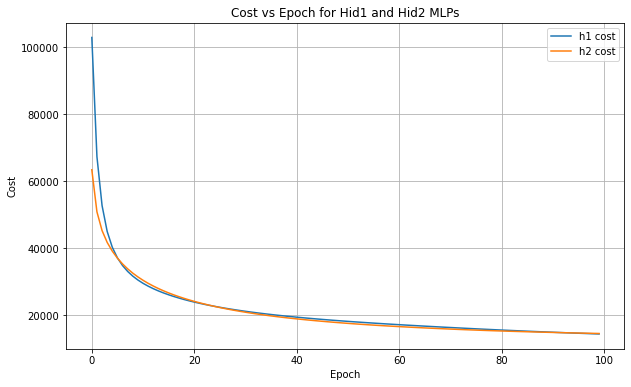

In [19]:
##plot cost results per epoch during triaining
plt.figure(figsize=(10,6))
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.title("Cost vs Epoch for Hid1 and Hid2 MLPs")
plt.plot(df_h1['epoch'], df_h1['cost'], label = "h1 cost")
plt.plot(df_h2['epoch'], df_h2['cost'], label = "h2 cost")
plt.grid()
plt.legend()
plt.show()

__Observations__: see results

ACRONYMs: 

- Network trained with one hidden Layer - H1

- Network trained with two hidden Layer - H2


__Results__:


- As expected, more epochs trained, the better the performance of both models. The models were not trained until the validation set started to increase due to time constraints.


- H1 trained nearly three times faster at ~34.0s versus H2 ~80.0s train time.


- H1 and H2 achieved comparable train and validation accuracies at 96.66%/96.04% and 96.65%/96.64% respectively. 

- H2's train and validation accuracies initially outperformed H1, with H2 starting at about 87% accuracy at epoch 1, and H1's accuracy at about 76%. 


- H1 and H2 achieved comparable test accuracies at 95.36% and 95.53% respectively.


- H1 and H2 achieved comparable overall cost at 14363.27 and 14509.65 respectively. H1's overall cost outperformed H2 by about 1.0%.


- During training, the cost of H2 started off much lower (60k) than H1 (100k) but eventually leveled out to nearly the same cost. The starting cost of H2 outperformed H1 by 40%.


Note: PLease see the implementation of NeuralNetMLP2Hid with comments on each of the steps in both the forward and fit method.